## Jesus Rodrigo Colina Nunez




## Data Understanding

Let's first load the data and understand the attributes meanings, shape of the dataset etc.

In [57]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [73]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import poisson
from scipy.stats import binom



from statsmodels.tools.eval_measures import mse, rmse

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [104]:
# Load Files

df_AP = pd.read_csv('Annual_Population_Change.csv') 

df2_EP = pd.read_csv('Estimated_Population_from_2006.csv') #YES





# EDA from our 2 files

In [19]:
df_1=df.copy() 

In [20]:
df_AP.shape

# Get the shape of the data (rows and columns)

(584, 5)

In [21]:
df_AP.columns 

Index(['STATISTIC Label', 'Year', 'Component', 'UNIT', 'VALUE'], dtype='object')

In [22]:
 # Get the data types of each column
df_AP.dtypes

STATISTIC Label     object
Year                 int64
Component           object
UNIT                object
VALUE              float64
dtype: object

In [23]:
df_AP.describe() # Get some descriptive statistics

,Year,VALUE
count,584.000000,440.000000
mean,1987.000000,633.262273
std,21.089371,1378.671718
min,1951.000000,-58.000000
25%,1969.000000,24.775000
50%,1987.000000,35.550000
75%,2005.000000,70.775000
max,2023.000000,5281.600000


In [24]:
df_AP.isnull().sum() #Check for missing values 

#We noticed we have 144 missing values

STATISTIC Label      0
Year                 0
Component            0
UNIT                 0
VALUE              144
dtype: int64

In [25]:
df_AP.head() # Display the first 5 rows of the dataset Annual_Population_Change

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1951,Annual births,Thousand,NaN
1,Annual Population Change,1951,Annual deaths,Thousand,NaN
2,Annual Population Change,1951,Natural increase,Thousand,26.6
3,Annual Population Change,1951,Immigrants,Thousand,NaN
4,Annual Population Change,1951,Emigrants,Thousand,NaN


In [26]:
df_AP.columns

Index(['STATISTIC Label', 'Year', 'Component', 'UNIT', 'VALUE'], dtype='object')

#### Unique values in Categorical columns

In [101]:
unique_components = df_AP['Component'].unique()
print("Unique Components:", unique_components)

Unique Components: ['Annual births' 'Annual deaths' 'Natural increase' 'Immigrants'
 'Emigrants' 'Net migration' 'Population change' 'Population']


In [28]:
df2_EP.shape #In order to see the columns and rows


(324, 6)

In [29]:
df2_EP.columns #To see the name of the columns

Index(['Statistic Label', 'Year', 'Sex', 'Citizenship', 'UNIT', 'VALUE'], dtype='object')

In [30]:
df2_EP.dtypes #Data type of each column

Statistic Label     object
Year                 int64
Sex                 object
Citizenship         object
UNIT                object
VALUE              float64
dtype: object

In [31]:
df2_EP.describe() #Get descripted stadistics

,Year,VALUE
count,324.000000,324.000000
mean,2014.500000,1052.622531
std,5.196152,1492.635331
min,2006.000000,21.300000
25%,2010.000000,58.975000
50%,2014.500000,121.350000
75%,2019.000000,2145.400000
max,2023.000000,5281.600000


In [32]:
df2_EP.isnull().sum() 

#We noticed we do not have any missing data

Statistic Label    0
Year               0
Sex                0
Citizenship        0
UNIT               0
VALUE              0
dtype: int64

In [33]:
df2_EP.head(10) #First 10 rows

,Statistic Label,Year,Sex,Citizenship,UNIT,VALUE
0,Estimated Population,2006,Both sexes,All Countries,Thousand,4232.9
1,Estimated Population,2006,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,Thousand,43.8
2,Estimated Population,2006,Both sexes,EU15 to EU27 (accession countries joined post ...,Thousand,132.5
3,Estimated Population,2006,Both sexes,United Kingdom,Thousand,115.5
4,Estimated Population,2006,Both sexes,Ireland,Thousand,3802.4
5,Estimated Population,2006,Both sexes,"All countries excluding Ireland,United Kingdom...",Thousand,138.8
6,Estimated Population,2006,Male,All Countries,Thousand,2117.3
7,Estimated Population,2006,Male,EU14 excl Irl (countries in the EU pre 2004 ex...,Thousand,21.3
8,Estimated Population,2006,Male,EU15 to EU27 (accession countries joined post ...,Thousand,79.9
9,Estimated Population,2006,Male,United Kingdom,Thousand,57.8


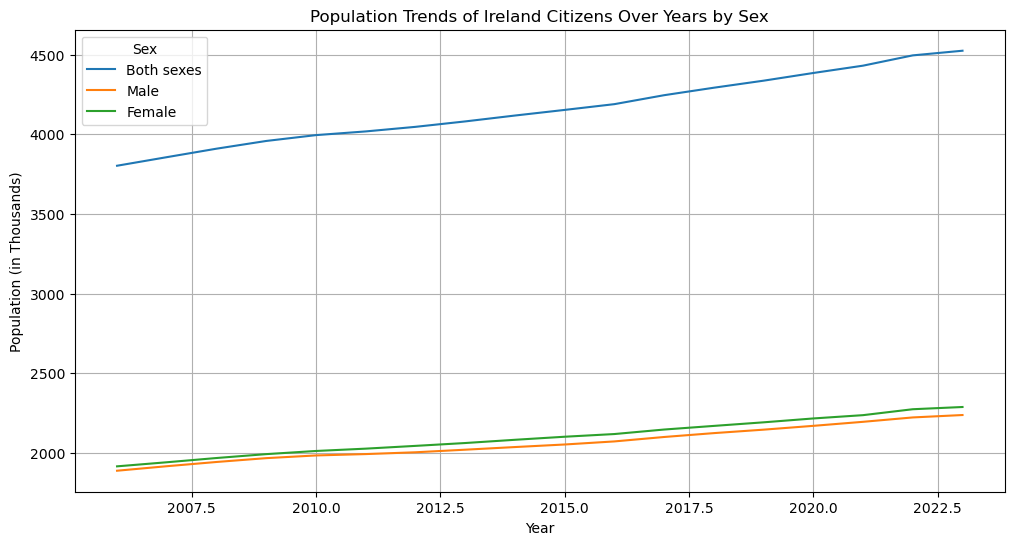

In [106]:
# Comparison of Population Trends by Sex
# Assuming we are focusing on a specific citizenship, e.g., 'Ireland'

# Filtering data for Ireland citizens
ireland_population = df2_EP[df2_EP['Citizenship'] == 'Ireland']

# Plotting the population trends for different sexes over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='VALUE', hue='Sex', data=ireland_population)
plt.title('Population Trends of Ireland Citizens Over Years by Sex')
plt.xlabel('Year')
plt.ylabel('Population (in Thousands)')
plt.legend(title='Sex')
plt.grid(True)
plt.show()

### We focused on Natural increase, to observe its trend over time.

<Axes: xlabel='Year', ylabel='VALUE'>

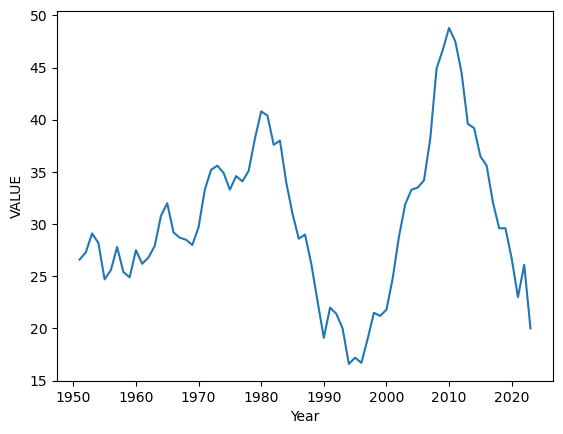

In [95]:
sample_data =df_AP[df_AP['Component'] == 'Natural increase'] 
sns.lineplot(x='Year', y='VALUE', data=sample_data)

#### We calculate de mean value and we group it by Component

In [97]:
grouped_data = df_AP.groupby('Component')['VALUE'].mean().reset_index()
print("Grouped Data by Component:\n", grouped_data)

Grouped Data by Component:
            Component        VALUE
0      Annual births    60.105405
1      Annual deaths    30.651351
2          Emigrants    48.459459
3         Immigrants    65.405405
4   Natural increase    30.260274
5      Net migration     1.078082
6         Population  3650.532877
7  Population change    31.339726


#### Here we can analyze the distribution of values

<Axes: xlabel='VALUE', ylabel='Count'>

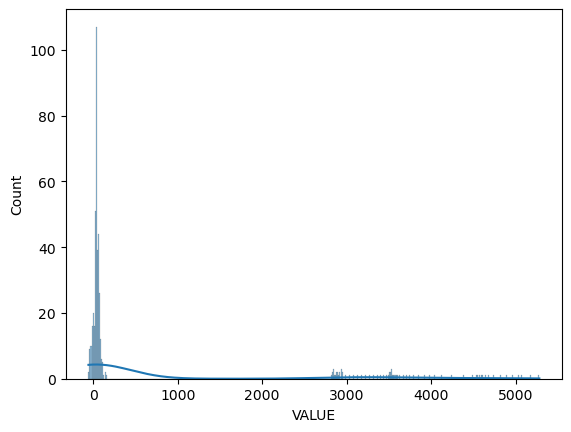

In [103]:
sns.histplot(df_AP['VALUE'], kde=True)

### Binominal distribution

#### f

In [163]:
from scipy.stats import binom

# Here we will define the sucsses condition - For example having more than 100 thousands 
success_threshold = 100  # Population in thousands

# Filter the data for 'United Kingdom' and 'Both sexes'
uk_data = df2_EP[(df2_EP['Citizenship'] == 'United Kingdom') & (df2_EP['Sex'] == 'Both sexes')]

# Calculate the number of years where the population exceeds the threshold (successes)
n_success = sum(uk_data['VALUE'] > success_threshold)

# Total number of years in the dataset for 'United Kingdom'
n_years = len(uk_data)

# Probability of success in a year
p_success = n_success / n_years

# Assuming we want to find the probability of this event happening in exactly k out of n years
k = 5  # Example: 5 years

# Calculate the Binomial Probability
binom_probability = binom.pmf(k, n_years, p_success)

binom_probability, p_success, n_success, n_years

(7.859491192724766e-06, 0.7777777777777778, 14, 18)

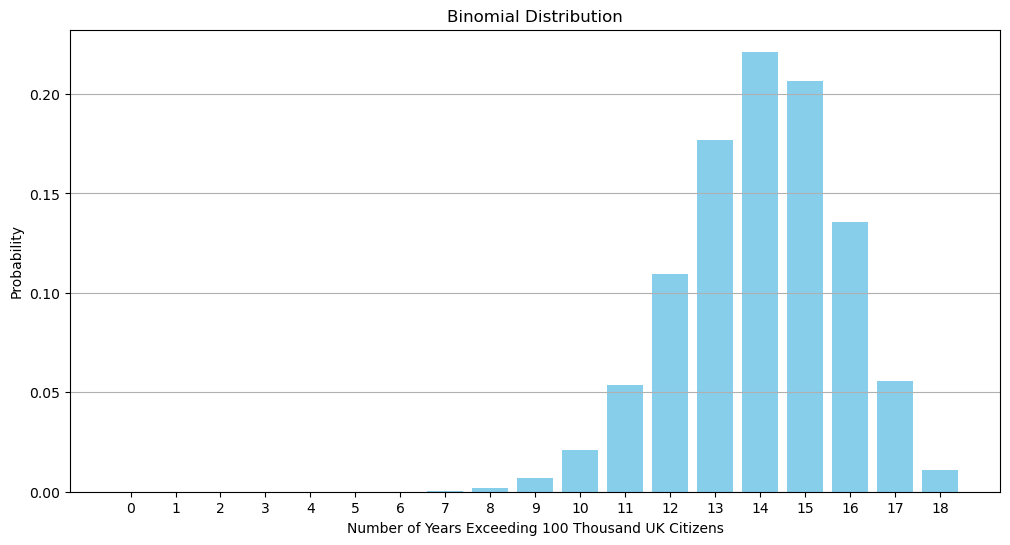

In [136]:
# Here we will use the values from the Binominal Distribution 
p_success = 0.7777777777777778  # Probability of success in a year
n_years = 18  # Total number of years observed

# Range of  values to calculate probability (from 0 to the total number of years that is 18)
k_values = range(n_years + 1)

# Calculating Binomial probabilities for each value
binom_probabilities = [binom.pmf(k, n_years, p_success) for k in k_values]

# Plotting the Binomial probabilities
plt.figure(figsize=(12, 6))
plt.bar(k_values, binom_probabilities, color='skyblue')
plt.title('Binomial Distribution')
plt.xlabel('Number of Years Exceeding 100 Thousand UK Citizens')
plt.ylabel('Probability')
plt.xticks(k_values)
plt.grid(axis='y')
plt.show()

# We noticed that there is the probability of 14 years out of 18 that there will be exceeding more than 100 thousand UK Citizens

### Binominal distribution 2

In [174]:
# Choose a citizenship group and a population threshold
citizenship = "Ireland"
population_threshold = 2000  # Population in thousands
gender = "Male"  # Choose either 'Male' or 'Female'

# Filter the data for the chosen citizenship and gender
gender_data = df2_EP[(df2_EP['Citizenship'] == citizenship) & (df2_EP['Sex'] == gender)]

# Calculate the number of years where the population exceeds the threshold (successes)
n_success = sum(gender_data['VALUE'] > population_threshold)

# Total number of years in the dataset for the chosen citizenship and gender
n_years = len(gender_data)

# Probability of success in a year
p_success = n_success / n_years

# Assuming we want to find the probability of this event happening in exactly k out of n years
k = 3  # Example: 3 years

# Calculate the Binomial Probability
binom_probability = binom.pmf(k, n_years, p_success)

binom_probability, p_success, n_success, n_years

# The probability of having more than 2000 thousand Male citizens of Ireland in exactly 12 out of 18 years 
# There is a 66%

(1.6849909040303783e-05, 0.6666666666666666, 12, 18)

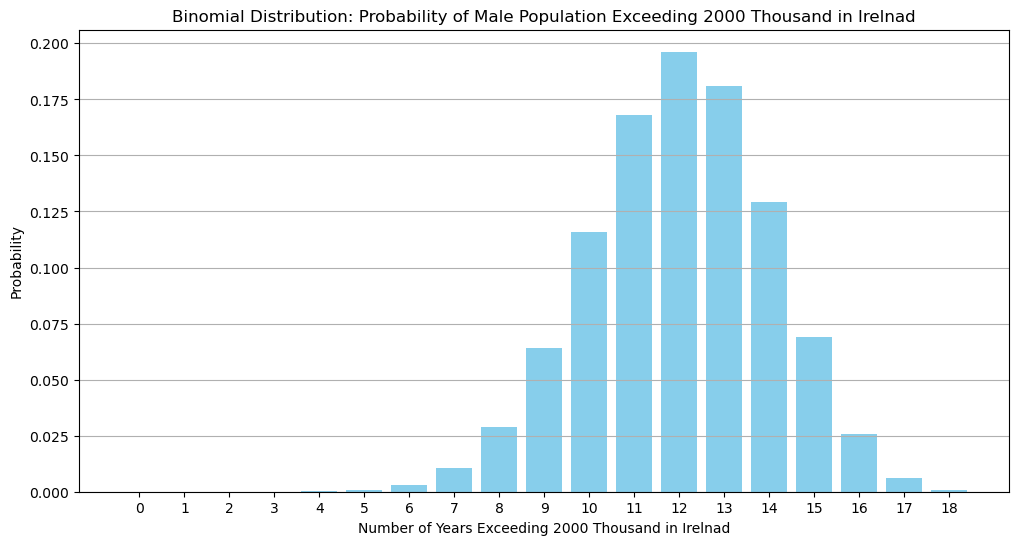

In [190]:
# Plot

# Assuming we want to find the probability of this event happening in a range of years
k_values = range(n_years + 1)  # Range from 0 to total number of years

# Calculate the Binomial Probabilities for each 'k' value
binom_probabilities = [binom.pmf(k, n_years, p_success) for k in k_values]

# Plotting the Binomial probabilities
plt.figure(figsize=(12, 6))
plt.bar(k_values, binom_probabilities, color='skyblue')
plt.title(f'Binomial Distribution: Probability of Male Population Exceeding 2000 Thousand in Irelnad')
plt.xlabel(f'Number of Years Exceeding 2000 Thousand in Irelnad')
plt.ylabel('Probability')
plt.xticks(k_values)
plt.grid(axis='y')
plt.show()



### Normal distribution 

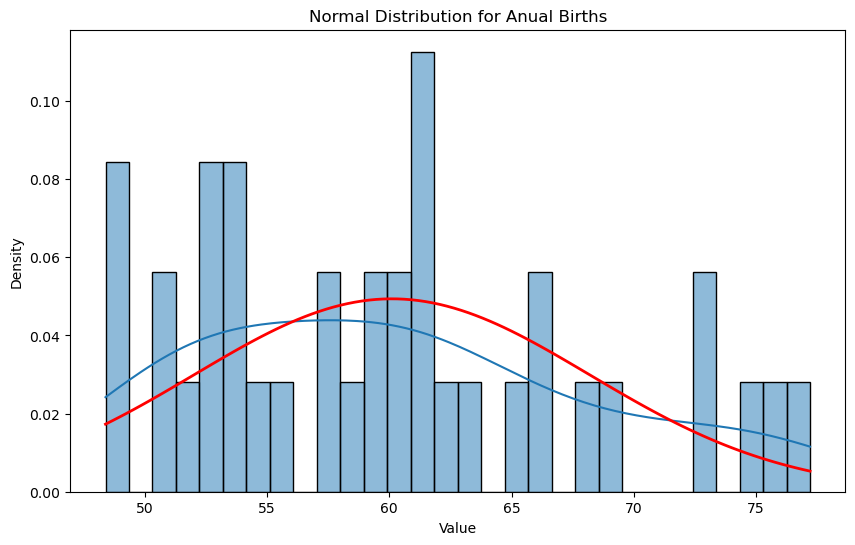

In [165]:

df1 = df_AP[df_AP['Year'] >= 2006]

# Here we are going to choose a component, for example: Annual births
component = 'Annual births'
component_data = df_AP[df_AP['Component'] == component]['VALUE'].dropna()

# Calculate mean and standard deviation
mean_value = component_data.mean()
std_dev = component_data.std()


# Generate a range of values from min to max
range_values = np.linspace(component_data.min(), component_data.max(), 100)
# Calculate the Normal distribution values
normal_dist = norm.pdf(range_values, mean_value, std_dev)

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(component_data, bins=30, kde=True, stat='density')
plt.plot(range_values, normal_dist, color='red', linewidth=2)
plt.title(f'Normal Distribution for Anual Births')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

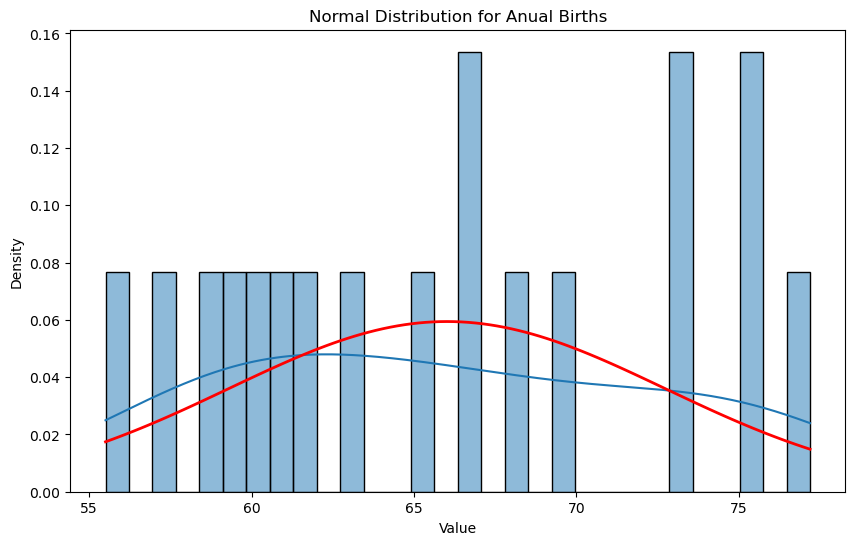

In [166]:
# For our data modeling we will only focuse from the year 2006 onwards 

# I want to know how my Normal Distribution for Anual Births would look from 2006
df1 = df_AP[df_AP['Year'] >= 2006]


# Here we are going to choose a component, for example: Annual births
component = 'Annual births'
component_data = df1[df1['Component'] == component]['VALUE'].dropna()

# Calculate mean and standard deviation
mean_value = component_data.mean()
std_dev = component_data.std()


# Generate a range of values from min to max
range_values = np.linspace(component_data.min(), component_data.max(), 100)
# Calculate the Normal distribution values
normal_dist = norm.pdf(range_values, mean_value, std_dev)

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(component_data, bins=30, kde=True, stat='density')
plt.plot(range_values, normal_dist, color='red', linewidth=2)
plt.title(f'Normal Distribution for Anual Births')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

# We noticed that my normal Distribution is more uniform 

### From now on we only going to focus from 2006 Onwards

In [37]:
# Filter data for years starting from 2006 from Annual_Population_Change
df = df_AP[df_AP['Year'] >= 2006]


In [38]:
df.head(10)

,STATISTIC Label,Year,Component,UNIT,VALUE
440,Annual Population Change,2006,Annual births,Thousand,61.2
441,Annual Population Change,2006,Annual deaths,Thousand,27.0
442,Annual Population Change,2006,Natural increase,Thousand,34.2
443,Annual Population Change,2006,Immigrants,Thousand,107.8
444,Annual Population Change,2006,Emigrants,Thousand,36.0
445,Annual Population Change,2006,Net migration,Thousand,71.8
446,Annual Population Change,2006,Population change,Thousand,106.0
447,Annual Population Change,2006,Population,Thousand,4232.9
448,Annual Population Change,2007,Annual births,Thousand,66.6
449,Annual Population Change,2007,Annual deaths,Thousand,28.4


In [39]:
print(df.head())


              STATISTIC Label  Year         Component      UNIT  VALUE
440  Annual Population Change  2006     Annual births  Thousand   61.2
441  Annual Population Change  2006     Annual deaths  Thousand   27.0
442  Annual Population Change  2006  Natural increase  Thousand   34.2
443  Annual Population Change  2006        Immigrants  Thousand  107.8
444  Annual Population Change  2006         Emigrants  Thousand   36.0


In [40]:
print(df.isnull().sum())

# Check for missing values
# Here we noticed we do not have any missing values like we did before, because we are using it from the year 2006

STATISTIC Label    0
Year               0
Component          0
UNIT               0
VALUE              0
dtype: int64


In [41]:
# Basic statistics
print(df.describe())

              Year        VALUE
count   144.000000   144.000000
mean   2014.500000   638.533333
std       5.206236  1557.762806
min    2006.000000   -27.500000
25%    2010.000000    33.300000
50%    2014.500000    57.300000
75%    2019.000000    78.500000
max    2023.000000  5281.600000


In [42]:

# Filter the rows where the Year column is greater than or equal to 2006 and the Label column contains the word "population"
#Since I am interested in data from 2006 onwards, we'll start by filtering out the earlier years.
df = df[(df['Year'] >= 2006) & (df['Component'].str.contains('population', case=False))]

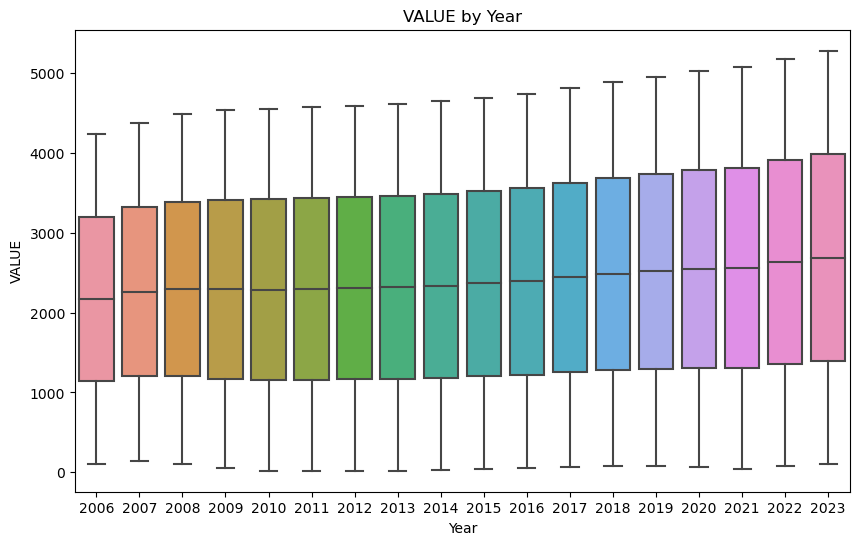

In [43]:
# Boxplot of 'VALUE' for each Year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='VALUE', data=df)
plt.title('VALUE by Year')
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.show()

In [44]:
# Wanted to make the same chart but Interactive 

fig = px.box(df, x='Year', y='VALUE', title='VALUE by Year',
             labels={'VALUE': 'Value', 'Year': 'Year'})

fig.show()

# I got this idea example from https://plotly.com/python/plotly-express/

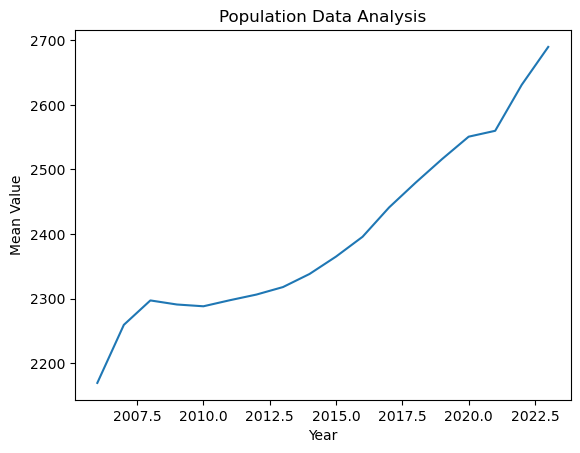

In [45]:
# Group the data by the Year column and calculate the mean of the VALUE column
grouped = df.groupby('Year')['VALUE'].mean()

# Plot the resulting data using a line chart
plt.plot(grouped.index, grouped.values)
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Population Data Analysis')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [146]:
from scipy.stats import norm

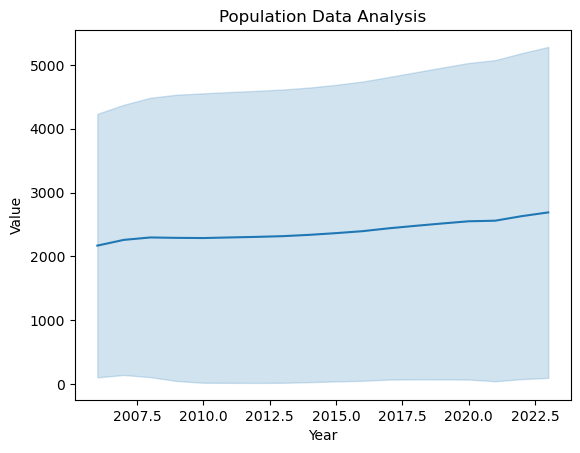

In [47]:
# Visualize the data using various plots and graphs
sns.lineplot(x='Year', y='VALUE', data=df)   ## Este si
plt.title('Population Data Analysis')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

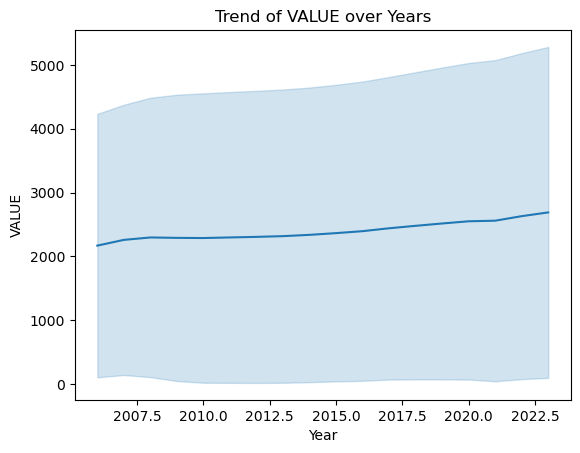

In [48]:
# Explore trends over years
sns.lineplot(x='Year', y='VALUE', data=df)
plt.title('Trend of VALUE over Years')
plt.show()

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [143]:

# Data Normalization using Min-Max scaling
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['VALUE']] = scaler.fit_transform(df[['VALUE']])

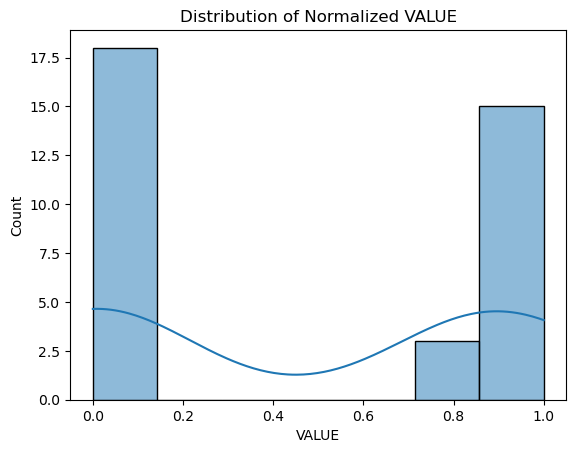

In [51]:
# Plot distribution of normalized 'VALUE'
sns.histplot(df_scaled['VALUE'], kde=True)
plt.title('Distribution of Normalized VALUE')
plt.show()


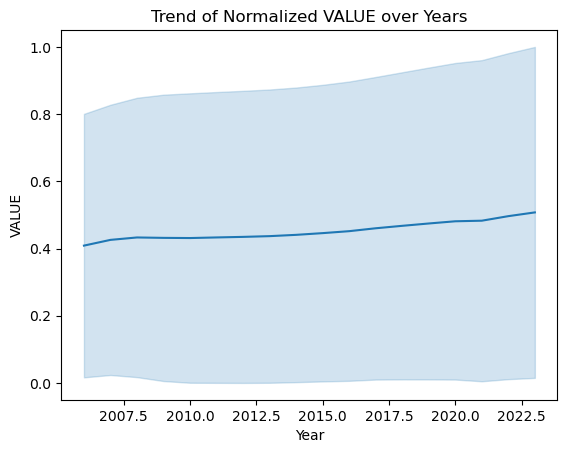

In [52]:
# Explore trends over years with normalized data
sns.lineplot(x='Year', y='VALUE', data=df_scaled)
plt.title('Trend of Normalized VALUE over Years')
plt.show()

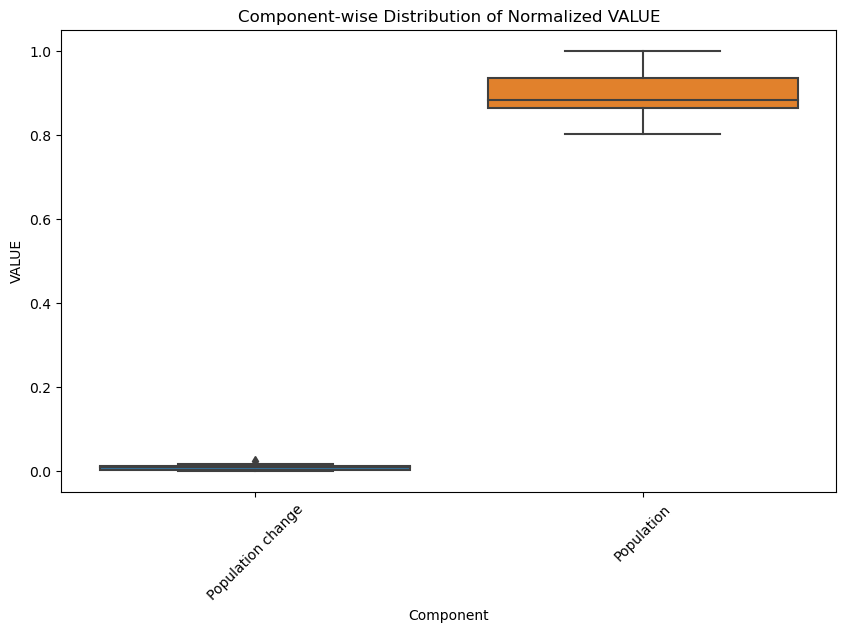

In [53]:

# Explore components and their normalized values
plt.figure(figsize=(10, 6))
sns.boxplot(x='Component', y='VALUE', data=df_scaled)
plt.title('Component-wise Distribution of Normalized VALUE')
plt.xticks(rotation=45)
plt.show()

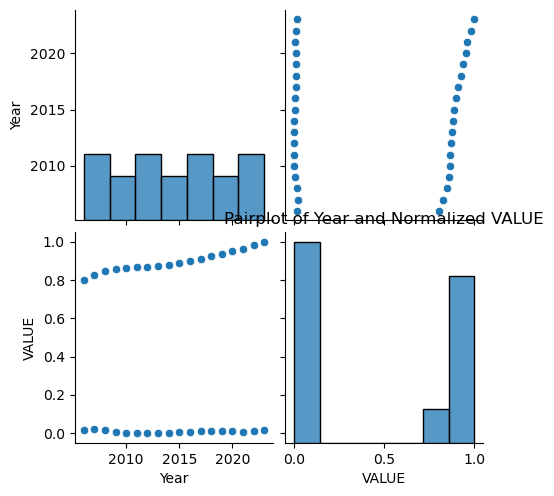

In [54]:
# Explore relationship between variables with normalized data
sns.pairplot(df_scaled[['Year', 'VALUE']])
plt.title('Pairplot of Year and Normalized VALUE')
plt.show()

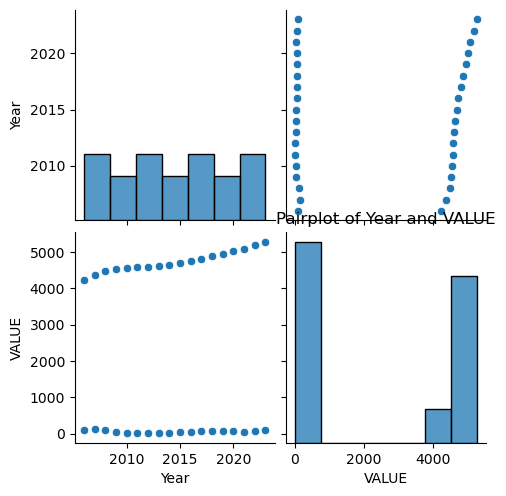

In [55]:
# Explore relationship between variables
sns.pairplot(df[['Year', 'VALUE']])
plt.title('Pairplot of Year and VALUE')
plt.show()

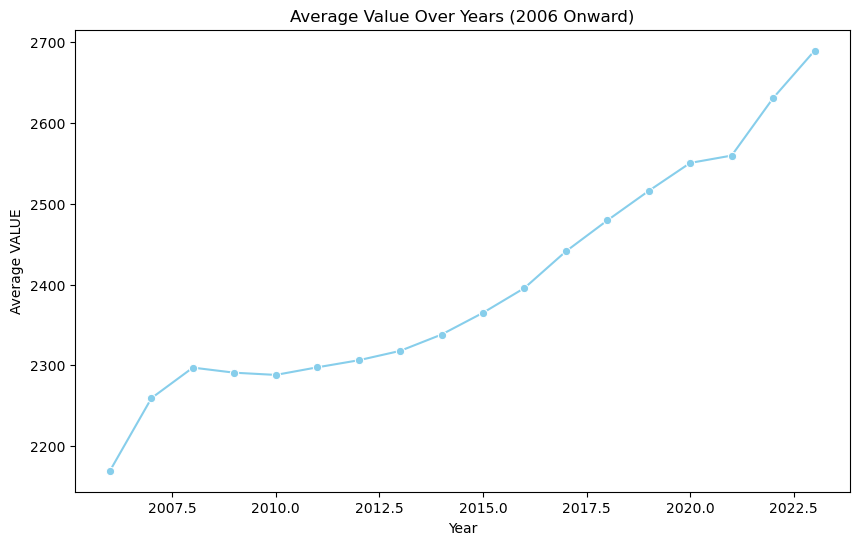

In [56]:
# Explore relationships between 'Year' and 'VALUE' using a lineplot
# Filter data for years 2006 and onwards
df_filtered = df[df['Year'] >= 2006]

# Explore relationships between 'Year' and 'VALUE' using a lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='VALUE', data=df_filtered, estimator='mean', ci=None, marker='o', color='skyblue')
plt.title('Average Value Over Years (2006 Onward)')
plt.xlabel('Year')
plt.ylabel('Average VALUE')
plt.show()

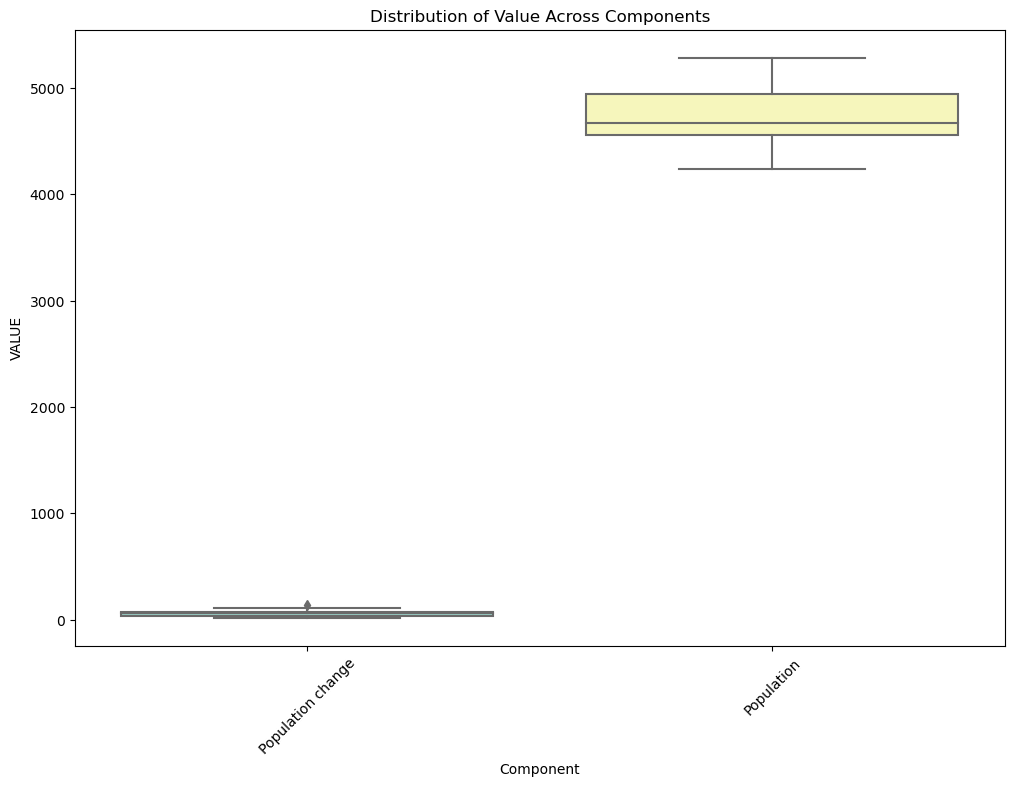

In [57]:
# Compare 'VALUE' across different 'Component' using a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Component', y='VALUE', data=df, palette='Set3')
plt.title('Distribution of Value Across Components')
plt.xlabel('Component')
plt.ylabel('VALUE')
plt.xticks(rotation=45)
plt.show()

## Data modeling 

In [58]:
# Filter for 'Population' component
population_data = df[df['Component'] == 'Population'].sort_values('Year')

# Use Year as a feature and VALUE as the target
X = population_data[['Year']]
y = population_data['VALUE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14, 1)
(4, 1)
(14,)
(4,)


### Linear Regression Model

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear}")

Linear Regression MSE: 2988.0476878204845


### Lasso Regression Model

In [81]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Create and fit the Lasso Regression model
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train, y_train)

# Predict on the test set for Lasso
y_pred_lasso = lasso_model.predict(X_test)

# Calculate MSE for Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)


# Predict on the test set for Linear Regression
y_pred_linear = linear_model.predict(X_test)

# Calculate MSE for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)

print("Mean Squared Error (Lasso Regression):", mse_lasso)

print("R-squared of the model in training set is: {}".format(lasso_model.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_model.score(X_test, y_test)))



Mean Squared Error (Lasso Regression): 2989.780331783848
R-squared of the model in training set is: 0.9444304165495616
-----Test set statistics-----
R-squared of the model in test set is: 0.8874000818656334


### KNN

In [77]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


# Creating and fitting the KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predicting on the test set using KNN
y_pred_knn = knn_model.predict(X_test)

# Calculating MSE for KNN Regression
mse_knn = mean_squared_error(y_test, y_pred_knn)

print("Mean Squared Error (KNN Regression):", mse_knn)



print("R-squared of the model in training set is: {}".format(knn_model.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(knn_model.score(X_test, y_test)))

Mean Squared Error (KNN Regression): 34870.83060000011
R-squared of the model in training set is: 0.9375089276436587
-----Test set statistics-----
R-squared of the model in test set is: -0.3132913575943779


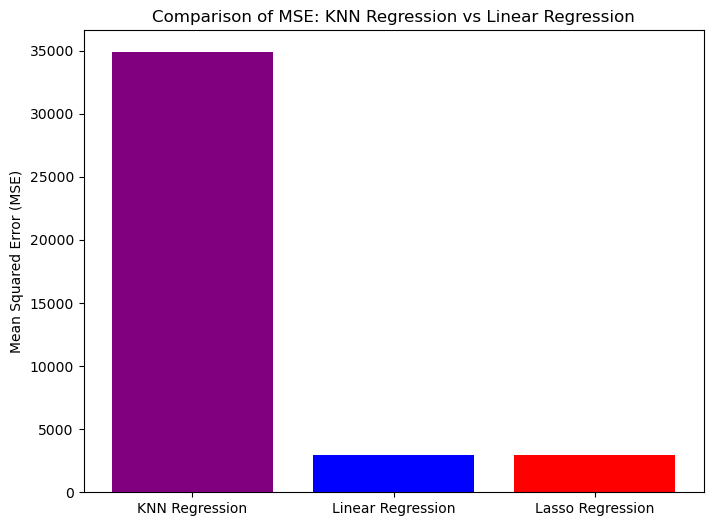

In [84]:


# Plotting the MSE values for comparison
plt.figure(figsize=(8, 6))
plt.bar(['KNN Regression', 'Linear Regression', 'Lasso Regression' ], [mse_knn, mse_linear, mse_lasso], color=['purple', 'blue', 'red' ])
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE: KNN Regression vs Linear Regression')
plt.show()




### Random Forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'], # Number of features to consider for the best split
    'max_depth': [None, 10, 20, 30], # Maximum depth of the tree
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Predict on the test set using the best model
y_pred_rf = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")




Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 10}
Random Forest MSE: 23621.058424999996


In [85]:
# Printing the MSE values
print(f"Random Forest MSE: {mse_rf}")
print("Mean Squared Error (KNN Regression):", mse_knn)
print("Mean Squared Error (Linear Regression):", mse_linear)
print("Mean Squared Error (Lasso Regression):", mse_lasso)

Random Forest MSE: 23621.058424999996
Mean Squared Error (KNN Regression): 34870.83060000011
Mean Squared Error (Linear Regression): 2988.0476878204845
Mean Squared Error (Lasso Regression): 2989.780331783848


### Forecast the next 5 Years using lineal regression

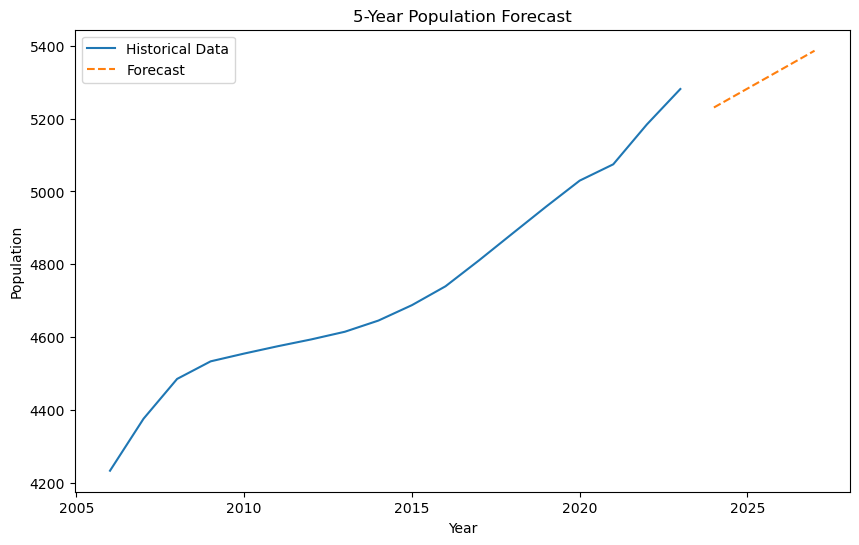

In [128]:
#Now we have our lineal regression model created we will us it to forecast the next 5 years using it
##--------

# Predicting for the next five years
current_year = X['Year'].max()
future_years = pd.DataFrame({'Year': [current_year + i for i in range(1, 5)]})
future_predictions =linear_model.predict(future_years)  #Here we are calling our model

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(X['Year'], y, label='Historical Data')
plt.plot(future_years, future_predictions, label='Forecast', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('5-Year Population Forecast')
plt.legend()
plt.show()

In [129]:

# Combining the years and the predicted values for easier display
predicted_population = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Population': future_predictions
})

predicted_population

,Year,Predicted Population
0,2024,5230.767974
1,2025,5282.763433
2,2026,5334.758892
3,2027,5386.754352


### Random Forest

In [133]:


# Generating future years (next 5 years)
future_years_rf = [current_year + i for i in range(1, 6)]

# Predicting population for the future years using the Random Forest model
rf_future_predictions = rf_model.predict(pd.DataFrame(future_years_rf, columns=['Year']))

# Creating a DataFrame to display the results
rf_predicted_population = pd.DataFrame({
    'Year': future_years_rf,
    'Predicted Population': rf_future_predictions
})

print(rf_predicted_population)

   Year  Predicted Population
0  2024              5236.672
1  2025              5236.672
2  2026              5236.672
3  2027              5236.672
4  2028              5236.672


## Compare the population by citizenship.

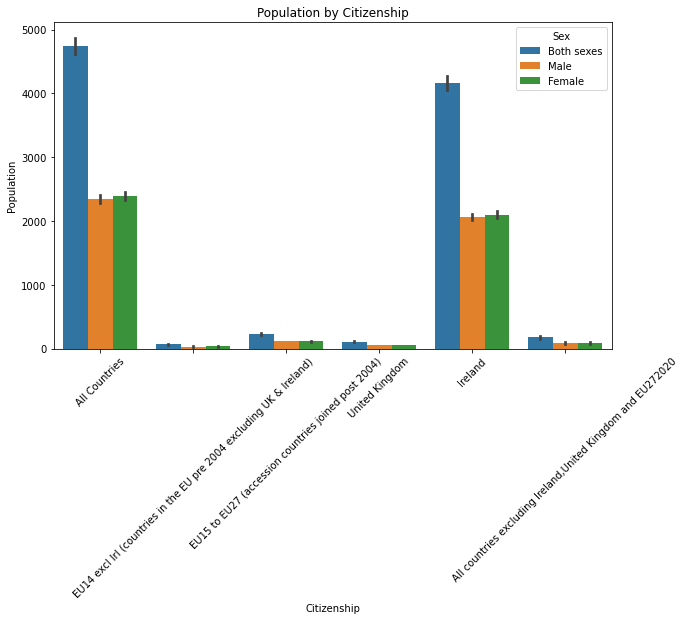

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df2, x="Citizenship", y="VALUE", hue="Sex")
plt.title("Population by Citizenship")
plt.xlabel("Citizenship")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.legend(title="Sex")
plt.show()

## Examine the distribution of values (population) for different units.

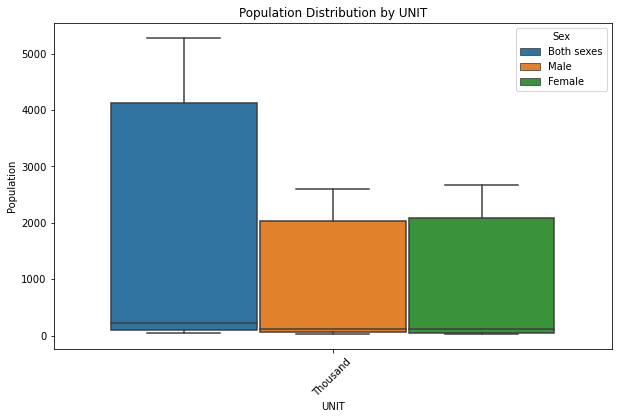

In [10]:
## Eliminarque edades hay mas, Eliminar ambos 

plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x="UNIT", y="VALUE", hue="Sex")
plt.title("Population Distribution by UNIT")
plt.xlabel("UNIT")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.legend(title="Sex")
plt.show()

## Here we explore relationships between numerical variables "Year" and "VALUE" by sex.

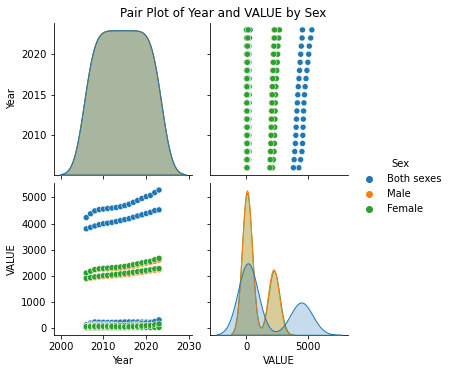

In [11]:
sns.pairplot(df2, hue="Sex", vars=["Year", "VALUE"])
plt.suptitle("Pair Plot of Year and VALUE by Sex", y=1.02)
plt.show()

## Here we visualize correlations between variables, "Year" and "VALUE."

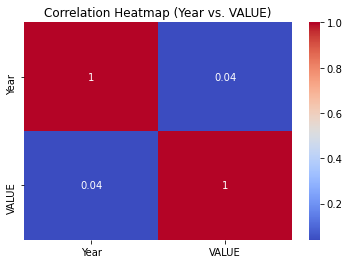

In [12]:
correlation_matrix = df2[["Year", "VALUE"]].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Year vs. VALUE)")
plt.show()